# Autotutorial de Pandas

In [2]:
#-- ALGUNOS MODULOS QUE VAMOS A NECESITAR
import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt

### Leyendo un conjunto de datos en formato CSV con Pandas
* Es importante recordar que no siempre es necesario usar Pandas. Depende del formato en el que nos lleguen los datos. 
* En este caso tenemos una fila por cada imagen 0 ó 1 

In [3]:
#[read_csv]- Leer un fichero CSV en un dataframe 
FullSet_0 = pd.read_csv('../../Datasets/1000ceros.csv', header=None)
FullSet_1 = pd.read_csv('../../Datasets/1000unos.csv',  header=None)

In [4]:
#[shape]- Mostrar las dimensiones de FullSet_0
FullSet_0.shape
#--fijate que shape no lleva paréntesis porque es un atributo del dataframe

(1000, 784)

In [5]:
#[head]- Mostrar la cabecera de FullSet_0 con las 8 primeras filas
FullSet_0.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Selección de filas y columnas

In [6]:
#[iloc]- Seleccionar la fila 0 de FullSet_0, es decir el primer ejemplo de este dataframe
x_version1 = FullSet_0[0:1]    
x_version2 = FullSet_0.iloc[0]
# La version 1 devuelve un dataframe con 1 sola fila
# La version 2 devuelve una 'serie' de Pandas
x_version2 #<- cambia 1 por 2 para ver la diferencia

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Name: 0, Length: 784, dtype: int64

In [7]:
#[iloc]- Seleccionar varias filas de FullSet_0
subsetX_ver1 = FullSet_0[3:9]
subsetX_ver2 = FullSet_0.iloc[3:9]
# Recordar que el límite superior del intervalo es 'abierto', es decir 'no entra'
# En este caso las dos versiones son iguales porque al haber más de una serie se devuelve siempre un dataframe
subsetX_ver2 #<- cambia 1 por 2 para ver la diferencia

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#[iloc]- Seleccionar todos los ejemplos del atributo (columna) número 180 de FullSet_0 
atrib_ver1 = FullSet_0[180]
atrib_ver2 = FullSet_0[:][180]
# En ambos casos devuelve una serie. Si queremos un dataframe debemos usar iloc (siguiente celda)
atrib_ver2 #<- cambia 1 por 2 para ver que no hay diferencia

0        0
1        0
2        0
3        0
4      118
      ... 
995      0
996      0
997      0
998     11
999    152
Name: 180, Length: 1000, dtype: int64

In [9]:
#[iloc]- Seleccionar ciertos atributos de varios ejemplos
X1 = FullSet_0.iloc[range(10,20)][range(5,15)]
X2 = FullSet_0.iloc[[0,2,4,6,8]][[20,40,60,80]]
# La mejor manera (y la más parecida a trabajar con Matlab) es utilizar iloc seguido 
#  de una lista con los indices de las filas 
#  y otra lista con los indices de las columnas
X2 #<- cambia 1 por 2 para ver cada "sub"dataframe

,20,40,60,80
0,0,0,0,0
2,0,0,0,0
4,0,0,0,0
6,0,0,0,0
8,0,0,0,0


### Accediendo a los valores para poder visualizarlos
* Matplotlib puede dibujar mostrar líneas e incluso imágenes almacenadas en dataframes directamente. 
* Sin embargo, en este caso, cada imagen ocupa 1 fila del dataset. 
    * Podemos usar plot para ver la serie de valores
    * pero para ver la imagen debemos cambiarla a su resolución original (28x28) 
    * Numpy tiene el método 'reshape' pero ¿podemos utilizarlo aquí?

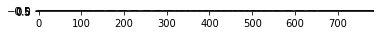

In [10]:
#-Vamos a comenzar intentando mostrar x_version1 directamente
plt.imshow(x_version1)
# No vemos nada porque es una serie (una única fila) y por tanto la imagen sólo tiene 1 pixel de alto

In [11]:
#-Vamos a intentar cambiar la resolución de x_version1, de 1x784 a 28x28
x_version1.reshape([28,28])
# Si lo has ejecutado, verás que devuelve un error!. 

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [29]:
#[values]- Para obtener un numpy array de un dataframe o de una serie tenemos que acceder a sus valores
# Una vez que tenemos el numpy array ¡ ya podemos hacer el reshape !
x_version1.values.reshape([28,28])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Comentarios
* En este ejemplo el dataframe creado no tenía nombres ni en las filas ni en las columnas. 
* En problemas de Machine Learning, en general, es frecuente que al menos las columnas, es decir los atributos, sí tengan nombre.
* Sin embargo en problemas de visión artificial, cuando trabajamos con imágenes, lo habitual es no tener nombres para los atributos.
* Además, una imagen a color tiene 3 canales (R,G,B) de manera que si recibimos un fichero de imágenes en formato CSV nos deben explicar de que manera se han guardado y la resolución de estas, para poder hacer reshape adecuadamete.

### Ejercicios

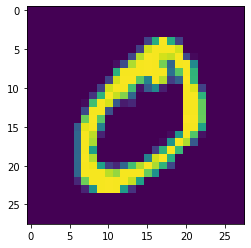

In [31]:
#-Sustituye el XXXXXXX para que se muestre la imagen de x_version1 en la instrucción de abajo
plt.imshow( x_version1.values.reshape([28,28]) )

In [33]:
#-Crear un dataframe llamado X0_train con 500 ejemplos aleatorios y no repetidos de FullSet_0
# AYUDA: Prueba a ejecutar el siguiente código
# # from random import shuffle
# # L = list(range(10))
# # shuffle(L)
# # R=L[0:6]
# # print(R)
from random import shuffle
L=list(range(1000))  #creamos una lista de 1000 elemetos (porque son los que tenemos)
shuffle(L)  # los movemos de sitio, para cojerlos de forma aleatoria
X0_train = FullSet_0.iloc[L[0:500]] # cogemos 500
print('X0_train.shape:', X0_train.shape)

X0_train.shape: (500, 784)


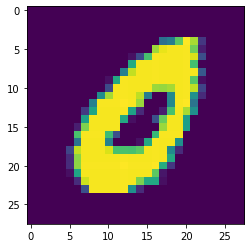

In [34]:
#-Mostrar una imagen de X0_train, que se pueda seleccionar con la variable img_sel
img_sel = 123
## resto del codigo a continuacion ##
img = X0_train.iloc[img_sel]
plt.imshow(img.values.reshape([28,28]))

In [37]:
#-Crear un dataframe llamado X_train que contenga 
# 500 ejemplos aleatorios de FullSet_0
# y 500 ejemplos aleatorios de FullSet_1
#-A continuación crear otro dataframe llamado X_test que contenga
# los 500 ejemplos no usados de FullSet_0
# y los 500 ejemplos no usado de FullSet_1
from random import shuffle
L=list(range(1000))  #creamos una lista de 1000 elemetos (porque son los que tenemos)
shuffle(L)  # los movemos de sitio, para cojerlos de forma aleatoria
X0_train = FullSet_0.iloc[:500] # cogemos 500
X1_train = FullSet_1.iloc[:500] # cogemos 500
print('X0_train.shape:', X0_train.shape)
print('X1_train.shape:', X1_train.shape)
X0_test = FullSet_0.iloc[500:] # cogemos 500
X1_test = FullSet_1.iloc[500:] # cogemos 500
print('X0_test.shape:', X0_test.shape)
print('X1_test.shape:', X1_test.shape)
X_train = pd.concat([X0_train, X1_train], ignore_index=True, axis=0)
X_test  = pd.concat([X0_test, X1_test],   ignore_index=True, axis=0)

X0_train.shape: (500, 784)
X1_train.shape: (500, 784)
X0_test.shape: (500, 784)
X1_test.shape: (500, 784)
